In [1]:
# Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_auc_score, f1_score

from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import roc_curve, auc


## Pictures of signs 

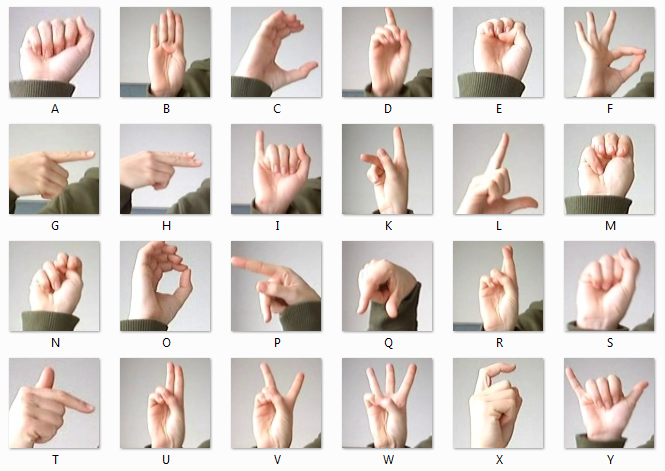

In [2]:
from IPython.display import Image
Image(filename="/Users/prasunamannava/Desktop/Metis/Neural_Networks/DeepLearning_Project/amer_sign2.png", width= 500, height=300)

## Load the dataset

In [3]:
df_sign = pd.read_csv('sign_mnist_train.csv')

In [4]:
df_sign.shape

(27455, 785)

In [5]:
df_sign.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


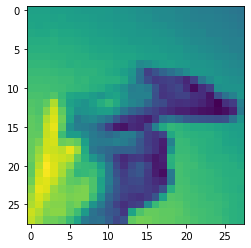

In [6]:
plt.imshow(np.array(df_sign.iloc[68, 1:]).reshape(28,28));

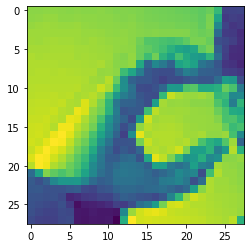

In [7]:
plt.imshow(np.array(df_sign.iloc[3, 1:]).reshape(28,28));

## Adding Alphabets

In [8]:
alphabets = 'abcdefghijklmnopqrstuvwxyz'
index = 0

alpha_num = {}
for alphabet in alphabets:
    alpha_num.update({index: alphabet})
    index += 1

In [9]:
alpha_num

{0: 'a',
 1: 'b',
 2: 'c',
 3: 'd',
 4: 'e',
 5: 'f',
 6: 'g',
 7: 'h',
 8: 'i',
 9: 'j',
 10: 'k',
 11: 'l',
 12: 'm',
 13: 'n',
 14: 'o',
 15: 'p',
 16: 'q',
 17: 'r',
 18: 's',
 19: 't',
 20: 'u',
 21: 'v',
 22: 'w',
 23: 'x',
 24: 'y',
 25: 'z'}

In [10]:
df_sign_alpha = df_sign.copy()

In [11]:
df_sign_alpha['Alphabet'] = df_sign_alpha['label'].map(alpha_num)

In [12]:
df_sign_alpha = df_sign_alpha.groupby('Alphabet').first().reset_index()

In [13]:
df_sign_alpha.head()

,Alphabet,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,a,0,197,195,196,195,197,196,195,196,...,84,65,182,213,211,212,212,213,213,213
1,b,1,146,149,150,150,151,152,152,153,...,196,197,197,196,196,195,194,194,190,187
2,c,2,187,188,188,187,187,186,187,188,...,202,201,200,199,198,199,198,195,194,195
3,d,3,107,118,127,134,139,143,146,150,...,207,207,207,207,206,206,206,204,203,202
4,e,4,221,221,222,222,222,224,223,220,...,6,8,0,193,249,234,236,233,233,232


In [14]:
df_alpha = df_sign_alpha.copy()

In [15]:
df_alpha = df_alpha['Alphabet']

In [16]:
df_sign_alpha = df_sign_alpha.drop(columns = 'Alphabet')

In [54]:
%store df_sign_alpha

Stored 'df_sign_alpha' (DataFrame)


## Pictures of Alphabets with numbers 

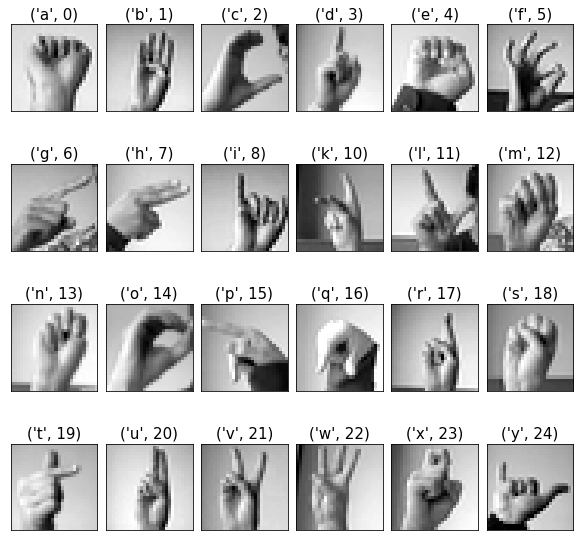

In [17]:
fig, axes = plt.subplots(nrows=4, ncols=6, figsize=(8, 8),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    img = np.array(df_sign_alpha.iloc[i, 1:785]).reshape(28,28)
    ax.imshow(img, cmap = 'gray')
    title = df_alpha.iloc[i],df_sign_alpha.label.iloc[i]
    ax.set_title(title, fontsize = 15)
plt.tight_layout(pad=0.5)
plt.show()



## Count of Classes

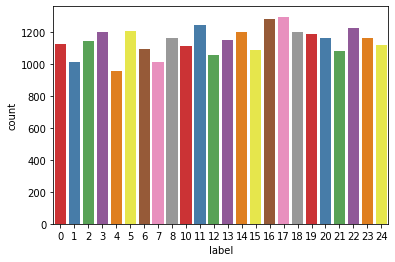

In [18]:
ax = sns.countplot(x="label", data=df_sign, palette = "Set1")

## Train Test Split

In [19]:
X_train = df_sign.iloc[:,1:785]

In [20]:
y_train = df_sign['label']

In [21]:
df_sign_test = pd.read_csv('sign_mnist_test.csv')

In [22]:
df_sign_test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53


In [23]:
X_test = df_sign_test.iloc[:,1:785]

In [24]:
y_test = df_sign_test['label']

## Scaling Data

In [25]:
scaler = StandardScaler()

In [26]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Multiclass Logistic Regression

In [27]:
lr = LogisticRegression(multi_class='multinomial',penalty='none', 
                         tol=0.1, solver='saga',)

In [28]:
lr.fit(X_train_scaled, y_train)

LogisticRegression(multi_class='multinomial', penalty='none', solver='saga',
                   tol=0.1)

In [29]:
y_train_pred = lr.predict(X_train_scaled)

In [30]:
y_test_pred = lr.predict(X_test_scaled)

In [31]:
accuracy = metrics.accuracy_score(y_test, y_test_pred)
precision = metrics.precision_score(y_test, y_test_pred, average = 'macro')
recall = metrics.recall_score(y_test, y_test_pred, average = 'macro')
f1 = metrics.f1_score(y_test, y_test_pred, average = 'macro')

In [32]:
print("Test Set Accuracy:" , round(accuracy, 3))
print("Test Set Precision:", round(precision, 3))
print("Test Set Recall:", round(recall, 3))
print("Test Set F1 Score:", round(f1, 3))

Test Set Accuracy: 0.704
Test Set Precision: 0.701
Test Set Recall: 0.691
Test Set F1 Score: 0.683


## Confusion Matrix

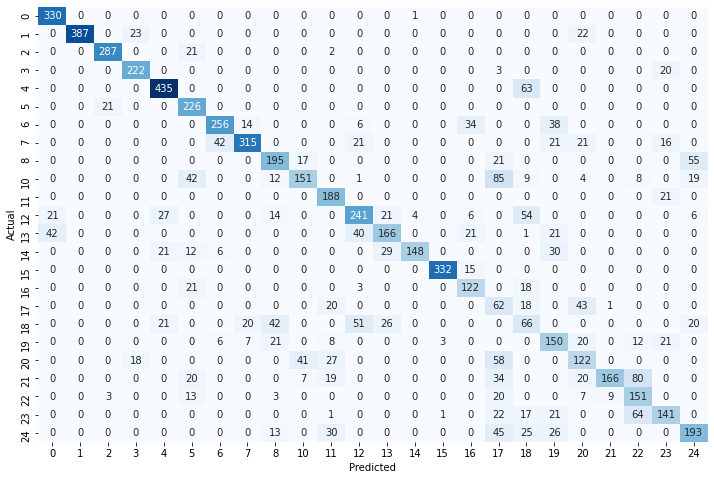

In [53]:
cm = pd.crosstab(y_test, y_test_pred, 
                               rownames=['Actual'], colnames=['Predicted'])
p = plt.figure(figsize=(12,8));
p = sns.heatmap(cm, annot=True, fmt="d", cbar=False, cmap="Blues")

## Evaluating Predicted Images

In [34]:
df_sign_test['Predicted'] = y_test_pred.tolist()

In [35]:
df_sign_test.head(2)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,Predicted
0,6,149,149,150,150,150,151,151,150,151,...,148,127,89,82,96,106,112,120,107,6
1,5,126,128,131,132,133,134,135,135,136,...,104,194,183,186,184,184,184,182,180,5


In [36]:
df_sign_incorrect = df_sign_test[(df_sign_test['label']!= df_sign_test['Predicted'])]

In [37]:
df_sign_incorrect.head(2)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,Predicted
12,21,128,131,133,135,137,139,140,142,145,...,130,73,45,61,76,84,85,65,66,10
22,21,130,133,137,141,143,145,147,149,150,...,188,180,182,180,179,178,175,176,174,11


In [55]:
df_sign_incorrect.shape

(2120, 786)

## Picking first row for each subclass

In [38]:
df_sign_incorrect_unique = df_sign_incorrect.groupby('label').first().reset_index()

In [39]:
df_sign_incorrect_unique.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,Predicted
0,0,195,195,195,195,196,196,196,197,197,...,80,140,199,208,211,212,212,211,211,14
1,1,92,95,82,69,65,61,60,34,54,...,98,147,166,168,171,173,175,176,176,20
2,2,115,128,135,136,141,145,150,155,159,...,250,250,253,232,160,94,52,42,43,5
3,3,153,154,154,154,155,154,154,156,154,...,174,185,182,181,180,178,176,173,171,23
4,4,119,123,128,131,134,136,139,140,142,...,67,69,68,65,65,68,54,139,204,18


In [40]:
df_sign_incorrect_unique_1 = df_sign_incorrect_unique.rename(columns={"label": "Actual", "Predicted": "label"})

In [41]:
df_sign_incorrect_unique_1.head()

,Actual,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,label
0,0,195,195,195,195,196,196,196,197,197,...,80,140,199,208,211,212,212,211,211,14
1,1,92,95,82,69,65,61,60,34,54,...,98,147,166,168,171,173,175,176,176,20
2,2,115,128,135,136,141,145,150,155,159,...,250,250,253,232,160,94,52,42,43,5
3,3,153,154,154,154,155,154,154,156,154,...,174,185,182,181,180,178,176,173,171,23
4,4,119,123,128,131,134,136,139,140,142,...,67,69,68,65,65,68,54,139,204,18


## Adding pixel data for predicted label

In [42]:
df_sign_incorrect_unique_2 = pd.merge(df_sign_incorrect_unique_1, df_sign_alpha, on="label")

In [43]:
df_sign_incorrect_unique_2.head()

,Actual,pixel1_x,pixel2_x,pixel3_x,pixel4_x,pixel5_x,pixel6_x,pixel7_x,pixel8_x,pixel9_x,...,pixel775_y,pixel776_y,pixel777_y,pixel778_y,pixel779_y,pixel780_y,pixel781_y,pixel782_y,pixel783_y,pixel784_y
0,0,195,195,195,195,196,196,196,197,197,...,226,225,223,222,221,205,168,135,97,78
1,1,92,95,82,69,65,61,60,34,54,...,49,151,154,151,150,149,147,145,144,143
2,2,115,128,135,136,141,145,150,155,159,...,108,106,112,182,210,187,175,162,144,135
3,16,107,109,114,120,133,145,153,161,168,...,108,106,112,182,210,187,175,162,144,135
4,3,153,154,154,154,155,154,154,156,154,...,218,220,221,223,226,228,229,230,230,230


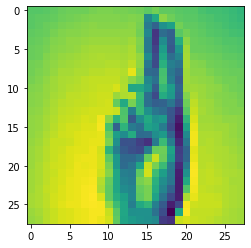

In [44]:
## Predicted image
plt.imshow(np.array(df_sign_incorrect_unique_2.iloc[1, 786:1570]).reshape(28,28));

fig, axes = plt.subplots(3, 2, figsize=(8, 8),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    actual = np.array(df_sign_incorrect_unique_2.iloc[i, 1:785]).reshape(28,28);
    predicted = np.array(df_sign_incorrect_unique_2.iloc[i, 786:1570]).reshape(28,28);
    title1 = df_sign_incorrect_unique_2.Actual.iloc[i]
    title2 = df_sign_incorrect_unique_2.label.iloc[i]
    ax.imshow(actual, cmap = 'gray')
    ax.set_title(title1, fontsize = 15)
    ax.imshow(predicted, cmap = 'gray')
    ax.set_title(title2, fontsize = 15)
plt.tight_layout(pad=0.5)
plt.show()


## Predicted Vs Actual Images

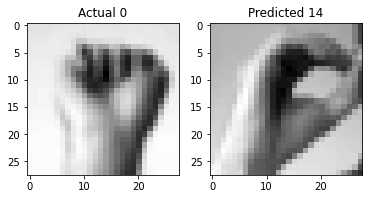

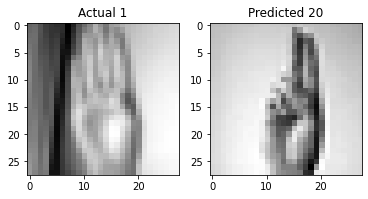

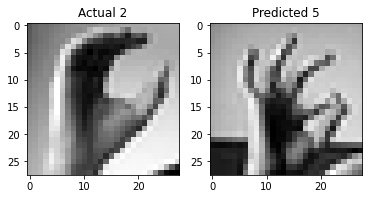

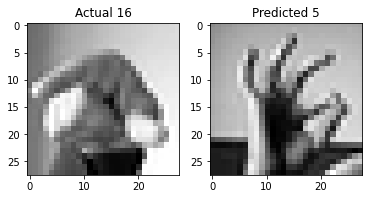

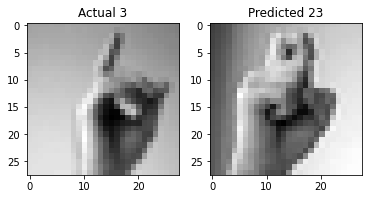

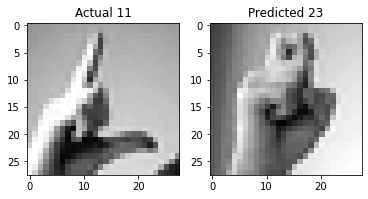

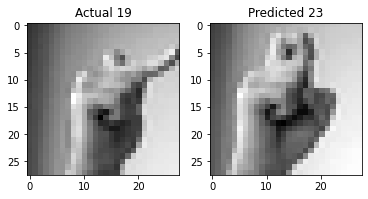

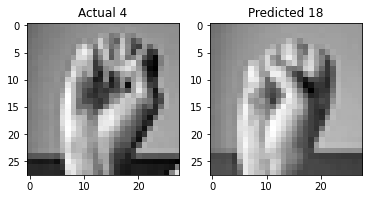

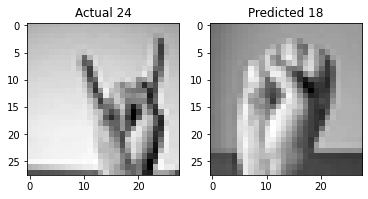

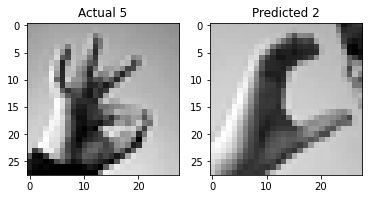

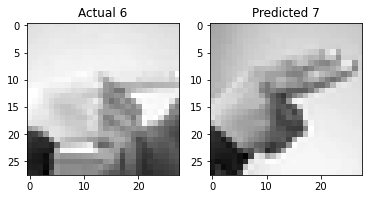

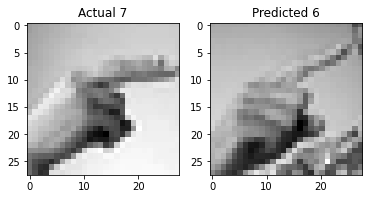

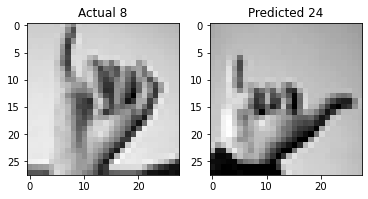

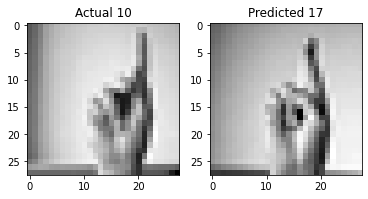

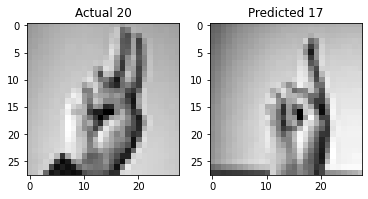

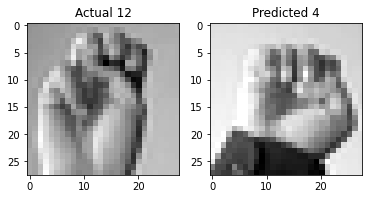

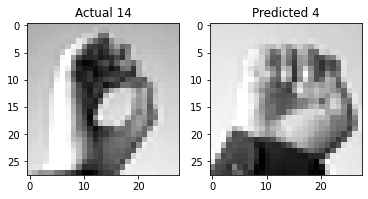

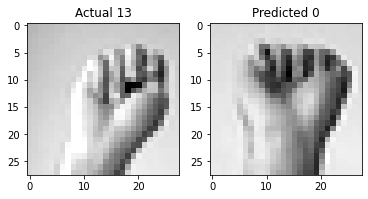

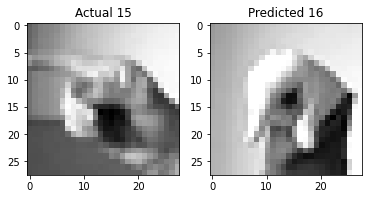

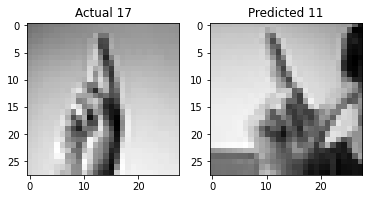

In [45]:
for i in range(20):
    image_actual = np.array(df_sign_incorrect_unique_2.iloc[i, 1:785]).reshape(28,28);
    image_predicted = np.array(df_sign_incorrect_unique_2.iloc[i, 786:1570]).reshape(28,28);


    plt.subplot(1, 2, 1) # row 1, col 2 index 1
    plt.imshow(image_actual, cmap = 'gray')
    plt.title(f"Actual {df_sign_incorrect_unique_2.Actual.iloc[i]}")


    plt.subplot(1, 2, 2) # index 2
    plt.imshow(image_predicted, cmap = 'gray')
    plt.title(f"Predicted {df_sign_incorrect_unique_2.label.iloc[i]}")


    plt.show()

In [46]:
## Initial code

fig, axes = plt.subplots(nrows=4, ncols=6, figsize=(8, 8),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    img = np.array(df_sign_incorrect.iloc[i, 1:785]).reshape(28,28)
    #img = np.array(df_sign_incorrect.iloc[i, 1:785]).reshape(28,28)
    ax.imshow(img, cmap = 'gray')
    title = df_sign_incorrect.label.iloc[i],df_sign_incorrect.Predicted.iloc[i]
    ax.set_title(title, fontsize = 15)
plt.tight_layout(pad=0.5)
plt.show()

## Most Misclassified Classes 85 pictures of 10 were classified as 17

In [47]:
mask_10 = df_sign[(df_sign['label'] == 10)]

In [48]:
mask_17 = df_sign[(df_sign['label'] == 17)]

## Comparing 10(k) and 17(r)

## K

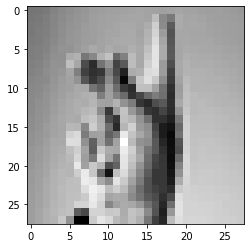

In [49]:
plt.imshow(np.array(mask_10.iloc[1, 1:]).reshape(28,28), cmap = 'gray');

## R

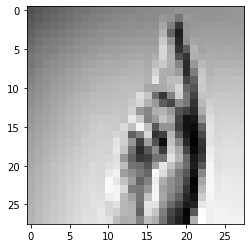

In [50]:
plt.imshow(np.array(mask_17.iloc[1, 1:]).reshape(28,28), cmap = 'gray');

## Interpreting the Coefficients

In [51]:
classes = ['0', '1', '2','3', '4','5', '6', '7', '8', '10', '11','12','13','14','15','16','17', '18','19','20','21','22','23', '24']
nclasses = len(classes)

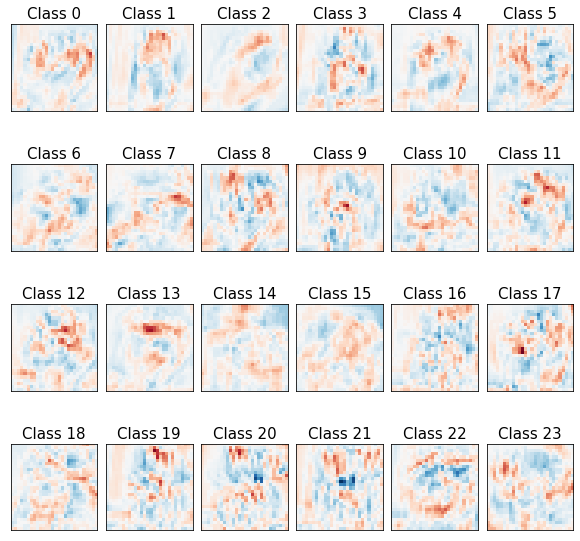

In [52]:
scale = np.max(np.abs(lr.coef_))
fig, axes = plt.subplots(nrows=4, ncols=6, figsize=(8, 8),
                        subplot_kw={'xticks': [], 'yticks': []})

#for a in range(nclasses):
for i,ax, in enumerate(axes.flat):
    ax.imshow(lr.coef_[i].reshape(28, 28), cmap=plt.cm.RdBu, vmin=-scale, vmax=scale)
    title = 'Class %i' % i
    ax.set_title(title, fontsize = 15)
plt.tight_layout(pad=0.5)
plt.show()

with positive coefficients in blue and negative coefficients in red